In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
NY_crime_2013 = pd.read_excel('data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', 
                              skiprows=range(4))

In [3]:
NY_crime_2013.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [4]:
# check the NaN distribution in each column
NY_crime_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.7+ KB


In [5]:
# drop the Rape (revised definition)1 column
NY_crime_2013.drop(NY_crime_2013.columns[4], axis=1, inplace=True)

In [6]:
NY_crime_2013.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [7]:
# check the data type of each column
NY_crime_2013.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [8]:
# since the assumed multivariable regression model includes only population, murder and robbery column
# keep only those three and property crime as the output
col = NY_crime_2013.columns
NY_crime_2013_clean = NY_crime_2013[[col[1], col[3], col[5], col[7]]]

In [9]:
NY_crime_2013_clean.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
0,1861.0,0.0,0.0,12.0
1,2577.0,0.0,0.0,24.0
2,2846.0,0.0,0.0,16.0
3,97956.0,8.0,227.0,4090.0
4,6388.0,0.0,4.0,223.0


In [10]:
NY_crime_2013_clean.columns

Index(['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery',
       'Property\ncrime'],
      dtype='object')

In [11]:
# rename column
NY_crime_2013_clean.rename(columns={NY_crime_2013_clean.columns[1]: 'Murder', 
                                    NY_crime_2013_clean.columns[3]: 'Property_crime'}, inplace=True)

In [12]:
NY_crime_2013_clean.head()

,Population,Murder,Robbery,Property_crime
0,1861.0,0.0,0.0,12.0
1,2577.0,0.0,0.0,24.0
2,2846.0,0.0,0.0,16.0
3,97956.0,8.0,227.0,4090.0
4,6388.0,0.0,4.0,223.0


In [13]:
# drop rows if any column of that row has NaN
NY_crime_2013_clean.dropna(inplace=True)

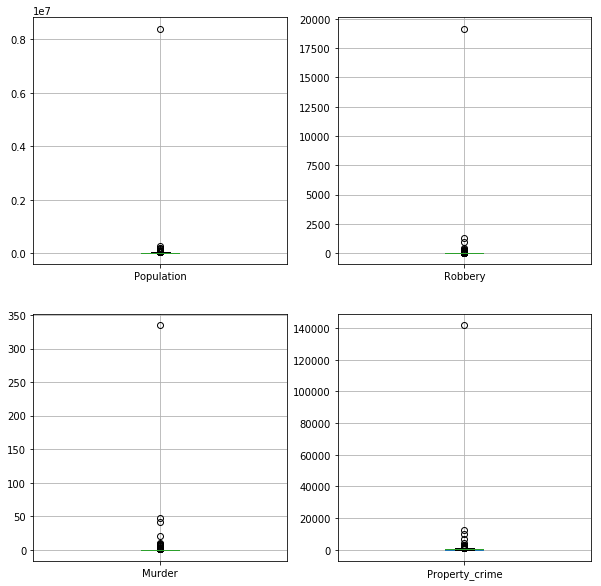

In [14]:
# inspect each column to see if there is any potential outlier
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
NY_crime_2013_clean.boxplot(column='Population', ax=ax[0][0])
NY_crime_2013_clean.boxplot(column='Murder', ax=ax[1][0])
NY_crime_2013_clean.boxplot(column='Robbery', ax=ax[0][1])
NY_crime_2013_clean.boxplot(column='Property_crime', ax=ax[1][1])
plt.show()

In [15]:
# convert murder and robbery column to categorical variable
NY_crime_2013_clean['Murder_cat'] = np.where(NY_crime_2013_clean['Murder'] > 0, 1, 0)
NY_crime_2013_clean['Robbery_cat'] = np.where(NY_crime_2013_clean['Robbery'] > 0, 1, 0)

In [16]:
# create another column population square
NY_crime_2013_clean['Population_sq'] = np.square(NY_crime_2013_clean['Population'])

In [17]:
NY_crime_2013_clean.head()

,Population,Murder,Robbery,Property_crime,Murder_cat,Robbery_cat,Population_sq
0,1861.0,0.0,0.0,12.0,0,0,3.463321e+06
1,2577.0,0.0,0.0,24.0,0,0,6.640929e+06
2,2846.0,0.0,0.0,16.0,0,0,8.099716e+06
3,97956.0,8.0,227.0,4090.0,1,1,9.595378e+09
4,6388.0,0.0,4.0,223.0,0,1,4.080654e+07


In [18]:
# rearrange the column order
NY_crime_2013_clean = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Murder_cat',  
                                           'Robbery', 'Robbery_cat', 'Property_crime']]

In [19]:
NY_crime_2013_clean.head()

,Population,Population_sq,Murder,Murder_cat,Robbery,Robbery_cat,Property_crime
0,1861.0,3.463321e+06,0.0,0,0.0,0,12.0
1,2577.0,6.640929e+06,0.0,0,0.0,0,24.0
2,2846.0,8.099716e+06,0.0,0,0.0,0,16.0
3,97956.0,9.595378e+09,8.0,1,227.0,1,4090.0
4,6388.0,4.080654e+07,0.0,0,4.0,1,223.0


In [20]:
# approach 1
# predicting Property_crime using cleaned dataset (changed the Murder and Robbery to catgorical data)
from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = NY_crime_2013_clean['Property_crime']
X = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder_cat', 'Robbery_cat']]
regr.fit(X, Y)
predict = regr.predict(X)
residue = Y - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]

Intercept: 
 -109.5753356225731

R-squared:
0.9961247104988709


In [21]:
# approach 2
# apply scaling to the column
from sklearn.preprocessing import StandardScaler 
X2 = StandardScaler().fit_transform(X)
regr.fit(X2, Y)
predict = regr.predict(X2)
residue = Y - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y))


Coefficients: 
 [ 1.55745316e+04 -7.96603912e+03  5.28221988e+00 -4.71547901e+01]

Intercept: 
 792.6063218390808

R-squared:
0.9961247104988709


In [22]:
# approach 3
# adding feature interaction between Murder and Robbery, adding more weight if Murder and Robbery occur at the 
# same time, in other words, both equal to 1
NY_crime_2013_clean['interaction'] = np.where((NY_crime_2013_clean['Murder'] == 1) & 
                                              (NY_crime_2013_clean['Robbery'] == 1),
                                              2, 0)
X3 = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder_cat', 'Robbery_cat', 'interaction']]
regr.fit(X3, Y)
predict = regr.predict(X3)
residue = Y - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X3, Y))


Coefficients: 
 [ 3.45397420e-02 -2.09735162e-09  3.02293182e+01 -9.47879907e+01
 -5.35234201e+01]

Intercept: 
 -109.14861362524948

R-squared:
0.9961271153685427


In [27]:
# appraoch 4
# using original Murder and Robbery data without categorizing them
X4 = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Robbery']]
regr.fit(X4, Y)
predict = regr.predict(X4)
residue = Y - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X4, Y))


Coefficients: 
 [ 1.59234099e-02 -1.01045767e-09  1.17559526e+02  2.09186042e+00]

Intercept: 
 24.14359019740391

R-squared:
0.9987417422426106


(array([  1.,   0.,   1.,   1.,   1.,  42., 270.,  22.,   6.,   4.]),
 array([-2308.14957702, -1945.04687478, -1581.94417254, -1218.8414703 ,
         -855.73876806,  -492.63606582,  -129.53336358,   233.56933865,
          596.67204089,   959.77474313,  1322.87744537]),
 <a list of 10 Patch objects>)

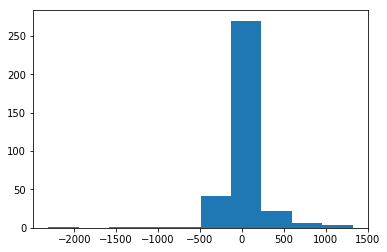

In [30]:
plt.hist(residue)

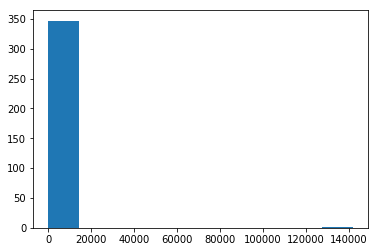

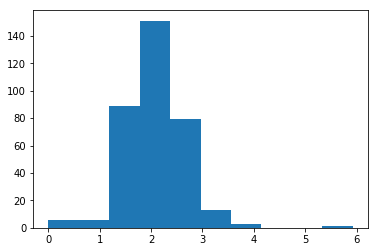

In [24]:
# test the normality of Y
plt.hist(Y)
plt.show()
plt.hist(Y**.15)
plt.show()

In [31]:
# approach 5
# transform Y to make it more close to normal distribution
X5 = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Robbery']]
regr.fit(X5, Y**0.15)
predict = regr.predict(X5)
residue = Y**0.15 - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X5, Y**0.15))


Coefficients: 
 [ 2.04674892e-05 -1.74422965e-12  1.45559331e-02 -2.58825894e-03]

Intercept: 
 1.778047403039504

R-squared:
0.5633144552354878


(array([  7.,   0.,   0.,   5.,  10.,  60., 118.,  93.,  50.,   5.]),
 array([-1.81259155, -1.54254504, -1.27249852, -1.00245201, -0.73240549,
        -0.46235897, -0.19231246,  0.07773406,  0.34778057,  0.61782709,
         0.88787361]),
 <a list of 10 Patch objects>)

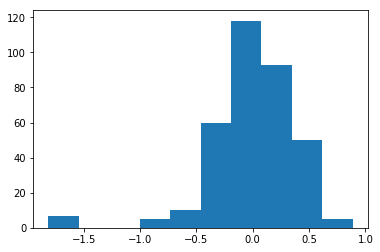

In [32]:
plt.hist(residue)

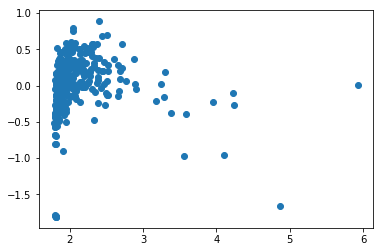

In [26]:
# test of heteroscedasticity
plt.scatter(predict, residue)